In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from matplotlib.colors import LogNorm

# Définir une fonction pour charger les données d'une année spécifique
def load(year):
    df = pd.read_csv(f'C:\\Master 1\\exiobase3-manipulation\\Impact - Consommation Finale\\LandUse - Consommation Finale\\LandUse - Data\\df_LandUse_{year}.csv')
    return df

In [2]:
df_2022 = load(2022)

In [4]:
df_2022_Exp = df_2022.sum(axis=1)
df_2022_Exp


Afrique                        1.928361e+07
Chine                          1.228794e+07
Asie Pacifique                 1.144273e+07
Amerique Latine et Caraïbes    6.927543e+06
Etats-Unis                     6.775232e+06
Inde                           4.909534e+06
Brésil                         4.357172e+06
Russie                         3.941447e+06
Union européenne               3.236870e+06
Indonésie                      2.523874e+06
Australie                      2.430736e+06
Canada                         1.976091e+06
Europe                         1.716477e+06
Moyen-Orient                   1.333436e+06
Mexique                        1.314793e+06
Japon                          3.404289e+05
dtype: float64

In [6]:
df_year_normalized = df_2022.div(df_2022_Exp, axis=0) * 100
df_year_normalized


,Afrique,Chine,Asie Pacifique,Amerique Latine et Caraïbes,Etats-Unis,Inde,Brésil,Russie,Union européenne,Indonésie,Australie,Canada,Europe,Moyen-Orient,Mexique,Japon
Afrique,80.759574,3.104851,1.625081,0.244773,1.597232,1.154389,0.232538,0.259646,5.869966,0.140883,0.113655,0.201537,1.226973,2.980942,0.123357,0.364603
Chine,0.567246,87.423685,3.617334,0.516389,2.532853,0.445653,0.187152,0.225321,1.559236,0.160065,0.173424,0.261198,0.524745,0.879674,0.132849,0.793176
Asie Pacifique,1.630942,24.349097,46.650168,0.885857,5.954451,3.124550,0.299170,0.893695,5.123053,1.414045,1.096376,0.560333,1.682262,2.790597,0.246836,3.298570
Amerique Latine et Caraïbes,1.413211,9.363816,3.106760,63.228849,6.522933,1.206840,1.865552,1.463951,4.632385,0.212658,0.188554,0.514662,2.326471,2.272555,0.695184,0.985619
Etats-Unis,0.777134,4.333544,5.089256,2.532233,74.610202,0.501052,0.289411,0.141227,2.277047,0.251089,0.168321,1.861778,0.789054,1.251041,2.388831,2.738781
Inde,0.539658,0.819173,1.746733,0.165373,1.090591,92.001646,0.078860,0.124200,1.139573,0.125429,0.076830,0.133405,0.408902,1.287557,0.055397,0.206673
Brésil,1.228372,9.011183,4.513394,4.174620,2.971497,0.901010,67.345639,0.204056,2.803846,0.194975,0.119968,0.245663,1.369820,4.030473,0.278558,0.606923
Russie,3.678906,13.235874,6.295519,0.636478,2.602545,1.024769,0.242801,57.092530,4.958189,0.339389,0.213308,0.238608,3.506350,4.773657,0.230912,0.930165
Union européenne,2.533701,2.983880,2.249347,0.603063,2.676341,0.439030,0.260007,0.840610,75.782357,0.112588,0.222131,0.326732,6.818163,3.180401,0.199612,0.772037
Indonésie,0.676704,2.811696,2.627866,0.231007,1.492208,1.648955,0.168998,0.183979,1.279778,86.361439,0.106238,0.147352,0.362526,0.846948,0.070062,0.984244


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from matplotlib.colors import LogNorm
import seaborn as sns
import imageio.v2 as imageio
import os
from matplotlib.ticker import FuncFormatter

# Définir une fonction pour charger les données d'une année spécifique
def load(year):
    df = pd.read_csv(f'C:\\Master 1\\exiobase3-manipulation\\Impact - Consommation Finale\\LandUse - Consommation Finale\\LandUse - Data\\df_LandUse_{year}.csv')
    order = ["Japon", "Inde", "Chine", "Indonésie", "Afrique", "Union européenne", "Etats-Unis", "Mexique", "Brésil",
              "Amerique Latine et Caraïbes", "Moyen-Orient", "Russie", "Europe","Asie Pacifique", "Canada", "Australie"]
    df = pd.DataFrame(df, index=order)
    df = df[order]

    return df

# Initialiser un dictionnaire pour stocker les DataFrames normalisées formatées pour chaque année
formatted_data = {}

# Boucle à travers les années de 1995 à 2022
for year in range(1995, 2023):
    # Charger les données pour l'année spécifique
    df_year = load(year)
    
    # Calculer la somme des colonnes pour cette année
    df_year_imp = df_year.sum(axis=1)
    
    # Normaliser les données et convertir en pourcentages
    df_year_normalized = df_year.div(df_year_imp, axis=0) * 100
    
    
    # Stocker le DataFrame formaté dans le dictionnaire avec la clé de l'année
    formatted_data[year] = df_year_normalized

# Créer un répertoire pour enregistrer les heatmaps
os.makedirs('LandUse_Exp_heatmap', exist_ok=True)

# Boucle à travers les années pour générer les heatmaps
for year, df_normalized in formatted_data.items():

    regions_ast = ["Japon", "Inde", "Chine", "Indonésie", "Afrique$^{1}$", "Union\neuropéenne$^{2}$", "Etats-Unis", "Mexique", "Brésil",
              "Amerique Latine\net Caraïbes$^{3}$", "Moyen-Orient$^{4}$", "Russie", "Europe$^{5}$","Asie Pacifique$^{6}$", "Canada", "Australie"    ]
    
    # Renommer les colonnes et les index avec les noms des régions
    df_normalized.columns = regions_ast
    df_normalized.index = regions_ast
    df_normalized.columns.name = "Région réceptrice d'utilisation des terres"
    df_normalized.index.name = "Région source d'utilisation des terres"
    
    # Créer une nouvelle figure pour chaque heatmap
    plt.figure(figsize=(30, 15))
    
    # Créer la heatmap avec seaborn
    sns.heatmap(df_normalized, norm=LogNorm(vmin=0.8, vmax=97),
            annot=True, fmt='.2f', cmap='YlOrRd', linewidths=0.1,
            cbar_kws={"label": "Pourcentage d'utilisation des terres (terres agricoles, forêts, pâturages) des régions sources (%)",
                      "format": FuncFormatter(lambda x, _: f'{x:.0f}'), "ticks": range(10, 100, 10)})

    
    # Ajouter un titre et ajuster la disposition
    plt.title(f"Utilisation des terres de chaque région source pour répondre à la consommation finale des régions réceptrices en {year}", fontsize=14, fontweight='bold', y=-0.09)
    plt.subplots_adjust(bottom=0.3)
    
    # Ajouter des notes de bas de page
    plt.subplots_adjust(bottom=0.3)
    plt.figtext(0.05, 0.07, '$^{1}$ Afrique hors Egypte.', fontsize=10)
    plt.figtext(0.05, 0.06, "$^{2}$ Représente les 27 pays actuels de l'Union européenne, indépendamment de l'année représentée.", fontsize=10)
    plt.figtext(0.05, 0.05, "$^{3}$ Amérique Latine et Caraïbes hors Brésil et Mexique", fontsize=10)    
    plt.figtext(0.05, 0.04, "$^{4}$ Moyen-Orient hors Turquie.", fontsize=10)
    plt.figtext(0.05, 0.03, "$^{5}$ Europe hors les pays membres de l'UE et Russie.", fontsize=10)
    plt.figtext(0.05, 0.02, '$^{6}$ Asie Pacifique hors Chine, Inde, Japon, Australie et Indonésie', fontsize=10)

    # Ajuster la disposition pour s'assurer que tout est inclus dans l'image
    plt.tight_layout(rect=[0, 0.1, 1, 0.95])
    
    # Sauvegarder la heatmap dans un fichier PNG
    frame_filename = f'C:\Master 1\Stage\Exio3\IOT_2011_ixi\LandUse_Exp_heatmap\LandUse_Exp_{year}.png'
    plt.savefig(frame_filename, bbox_inches='tight')
    
    # Fermer la figure pour libérer la mémoire
    plt.close()


In [20]:
images = []
for year in formatted_data.keys():
    frame_filename = f'C:\Master 1\Stage\Exio3\IOT_2011_ixi\LandUse_Exp_heatmap\LandUse_Exp_{year}.png'
    images.append(imageio.imread(frame_filename))

gif_filename = 'LandUse_FinalConso_Exp_Heatmap.gif'
imageio.mimsave(gif_filename, images, duration=1000, loop=0)

In [21]:
def load(year):
    df = pd.read_csv(f'C:\\Master 1\\exiobase3-manipulation\\Impact - Consommation Finale\\LandUse - Consommation Finale\\LandUse - Data\\df_LandUse_{year}.csv')
    order = ["Japon", "Inde", "Chine", "Indonésie", "Afrique", "Union européenne", "Etats-Unis", "Mexique", "Brésil",
              "Amerique Latine et Caraïbes", "Moyen-Orient", "Russie", "Europe","Asie Pacifique", "Canada", "Australie"]
             
    df_year_imp = df.sum(axis=1)
    
    # Normaliser les données et convertir en pourcentages
    df_year_normalized = df.div(df_year_imp, axis=0) * 100
    # Réorganiser la DataFrame selon l'ordre spécifié
    df1 = pd.DataFrame(df_year_normalized, index=order)
    df1 = df1[order]
    
    # Extraire les valeurs de la diagonale et conserver les labels des index
    diagonal_val = df1.values.diagonal()
    
    # Créer une nouvelle DataFrame avec les valeurs de la diagonale
    df_diag = pd.DataFrame(diagonal_val, index=order, columns=[f'{year}'])
    
    return df_diag

In [28]:
diagonals_list = []

for year in range(1995, 2023):
    df_diag = load(year)
    diagonals_list.append(df_diag)

# Concaténer toutes les DataFrames diagonales en une seule DataFrame finale
df_all_diagonals = pd.concat(diagonals_list, axis=1)

# Afficher la DataFrame finale
df_all_diagonals

,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Japon,98.584741,98.422846,98.107438,97.917890,97.805437,97.989422,97.776656,97.547878,97.560373,97.288943,...,96.852478,96.638356,96.274246,95.856747,95.377468,94.644143,94.845705,94.809418,95.497786,95.250551
Inde,96.711861,92.543619,92.448149,92.314494,92.597367,92.084279,90.756078,91.625173,91.844137,89.782123,...,85.849898,88.833427,89.445996,91.207760,91.132913,90.949130,91.501486,91.720704,92.073735,92.001646
Chine,91.908551,94.219438,90.650529,90.185557,92.412709,89.679610,89.730520,88.513263,86.165881,83.016954,...,83.457258,82.943105,84.167173,84.592366,85.797696,85.462715,85.870163,85.958315,86.254401,87.423685
Indonésie,34.924042,41.511209,30.703477,16.280017,46.421129,53.278419,50.136024,59.480809,63.593022,65.488120,...,82.346500,83.408219,85.366970,86.371250,83.368055,83.834528,85.698809,85.666021,86.184184,86.361439
Afrique,80.821350,78.569593,80.315673,82.852606,80.932525,77.947622,80.258807,81.924350,83.374206,82.593558,...,81.320935,81.660984,84.057689,84.620844,81.751670,80.972625,81.875121,80.876253,81.472268,80.759574
Union européenne,87.575618,87.489352,85.555820,86.282093,85.489983,84.862666,85.429947,85.432808,86.390131,86.241343,...,79.069524,78.745978,78.032543,78.543012,77.717234,77.041405,76.266735,75.680891,75.804317,75.782357
Etats-Unis,78.155157,76.238896,75.605200,79.934837,78.152271,79.635004,81.544408,81.872285,81.442103,83.907242,...,72.047359,72.689862,73.362568,73.644404,72.986769,74.001392,73.275243,73.883244,74.354675,74.610202
Mexique,92.704570,88.991941,88.860737,88.645434,87.946199,86.975396,87.815467,88.883986,87.211071,85.661933,...,81.432167,77.319273,72.533446,72.343318,71.446185,68.588319,67.246602,66.357794,66.066785,68.883330
Brésil,92.116241,91.203447,91.869490,91.165969,87.889627,87.331605,82.891606,80.076620,79.361642,76.335452,...,77.416009,79.322884,71.595067,72.425761,70.909005,66.314896,67.439163,67.204483,67.030121,67.345639
Amerique Latine et Caraïbes,74.774904,72.550460,74.504503,74.104419,73.964161,74.898097,75.862774,69.552951,67.752146,65.917957,...,71.261999,71.212923,70.326136,69.106741,68.288475,66.652085,65.697597,64.437798,64.001721,63.228849


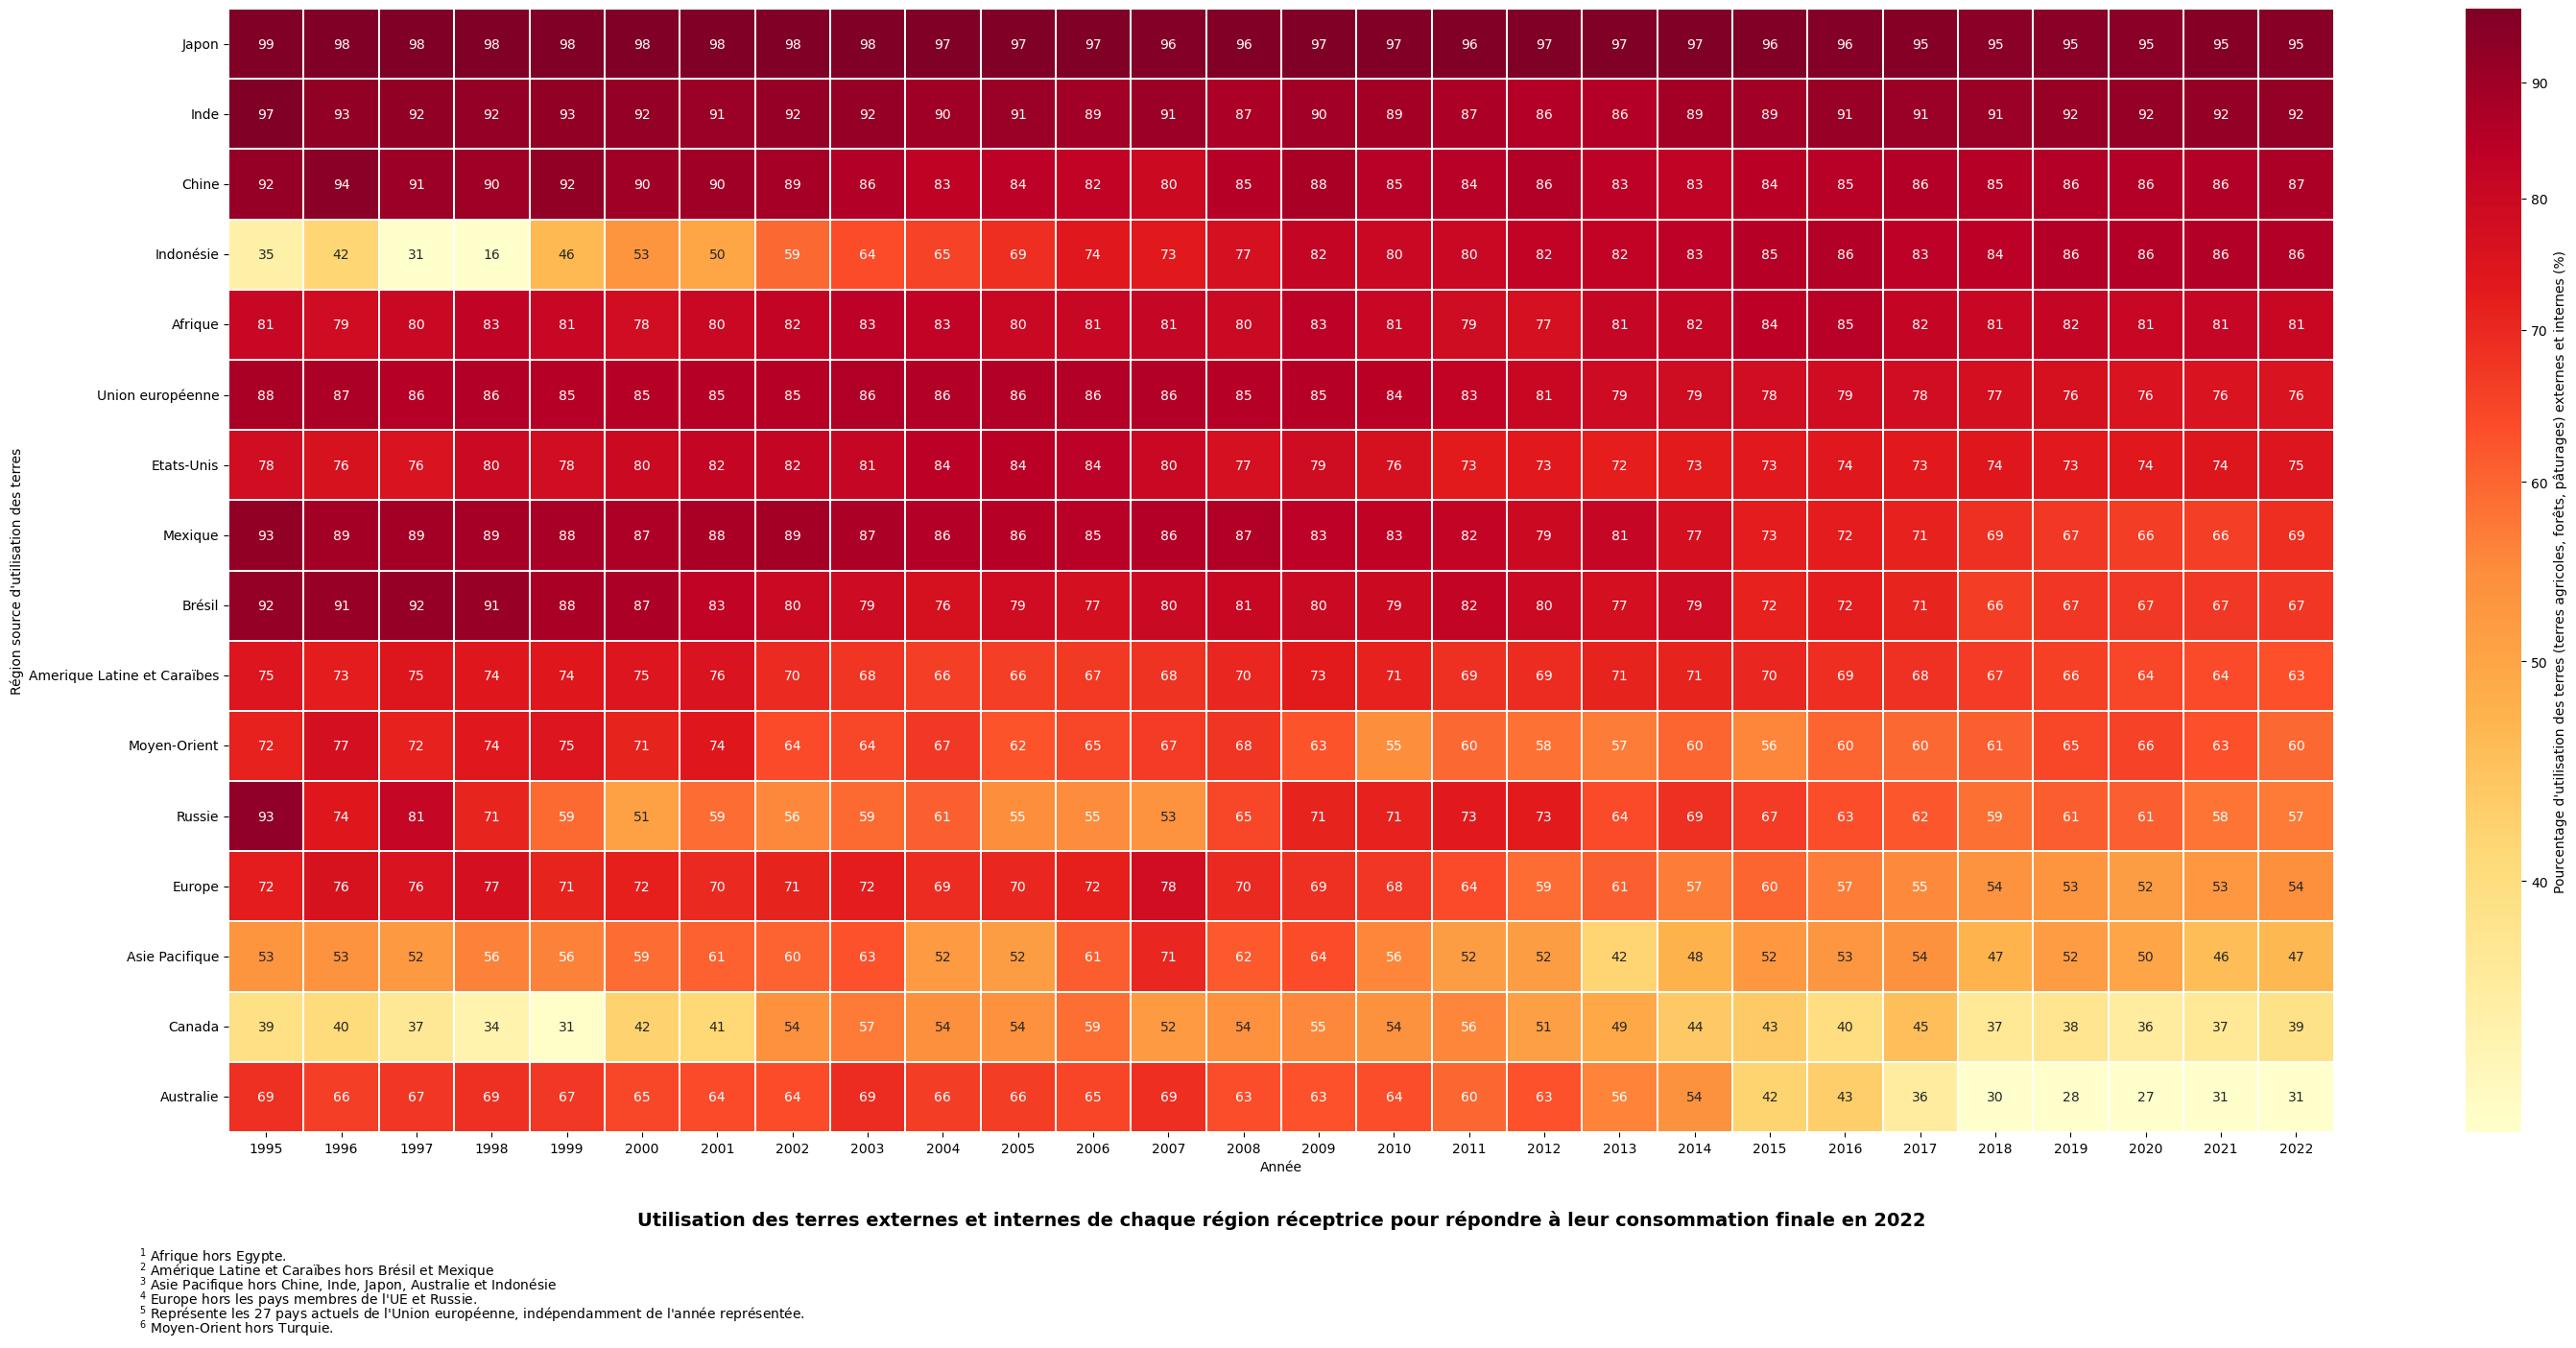

In [27]:
#regions_ast = ["Afrique$^{1}$","Brésil","Amerique Latine\net Caraïbes$^{2}$", "Indonésie", "Russie", "Inde",  "Australie", "Mexique", 
                 #  "Asie Pacifique$^{3}$", "Canada",  "Chine","Etats-Unis", "Europe$^{4}$", "Union\neuropéenne$^{5}$",  "Moyen-Orient$^{6}$",  "Japon"]
    
# Renommer les colonnes et les index avec les noms des régions

#df_all_diagonals.index = regions_ast
df_all_diagonals.columns.name = "Année"
df_all_diagonals.index.name = "Région source d'utilisation des terres"
    
    
# Créer une nouvelle figure pour chaque heatmap
plt.figure(figsize=(30, 15))
    
# Créer la heatmap avec seaborn
sns.heatmap(df_all_diagonals, norm=LogNorm(vmin=31, vmax=97),
            annot=True, cmap='YlOrRd', linewidths=0.1,
            cbar_kws={"label": "Pourcentage d'utilisation des terres (terres agricoles, forêts, pâturages) externes et internes (%)",
                       "format": FuncFormatter(lambda x, _: f'{x:.0f}'), "ticks": range(10, 100, 10)})

    
# Ajouter un titre et ajuster la disposition
plt.title(f"Utilisation des terres externes et internes de chaque région réceptrice pour répondre à leur consommation finale en {year}", fontsize=14, fontweight='bold', y=-0.09)
plt.subplots_adjust(bottom=0.3)
    
# Ajouter des notes de bas de page
plt.subplots_adjust(bottom=0.3)
plt.figtext(0.05, 0.07, '$^{1}$ Afrique hors Egypte.', fontsize=10)
plt.figtext(0.05, 0.06, "$^{2}$ Amérique Latine et Caraïbes hors Brésil et Mexique", fontsize=10)
plt.figtext(0.05, 0.05, "$^{3}$ Asie Pacifique hors Chine, Inde, Japon, Australie et Indonésie", fontsize=10)    
plt.figtext(0.05, 0.04, "$^{4}$ Europe hors les pays membres de l'UE et Russie.", fontsize=10)
plt.figtext(0.05, 0.03, "$^{5}$ Représente les 27 pays actuels de l'Union européenne, indépendamment de l'année représentée.", fontsize=10)
plt.figtext(0.05, 0.02, '$^{6}$ Moyen-Orient hors Turquie.', fontsize=10)

# Ajuster la disposition pour s'assurer que tout est inclus dans l'image
plt.tight_layout(rect=[0, 0.1, 1, 0.95])
    
# Sauvegarder la heatmap dans un fichier PNG
frame_filename = f'C:\Master 1\Stage\Exio3\IOT_2011_ixi\LandUse_Imp_Diag\LandUse_Imp_{year}.png'
plt.savefig(frame_filename, bbox_inches='tight')

plt.show()


In [35]:
df_all_diagonals 

index = ["Indonésie", "Mexique", "Brésil", "Russie", "Moyen-Orient", "Europe", "Asie Pacifique", "Canada", "Australie"]

df1 = df_all_diagonals.loc[index]
df1

Année,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Indonésie,34.924042,41.511209,30.703477,16.280017,46.421129,53.278419,50.136024,59.480809,63.593022,65.488120,...,82.346500,83.408219,85.366970,86.371250,83.368055,83.834528,85.698809,85.666021,86.184184,86.361439
Mexique,92.704570,88.991941,88.860737,88.645434,87.946199,86.975396,87.815467,88.883986,87.211071,85.661933,...,81.432167,77.319273,72.533446,72.343318,71.446185,68.588319,67.246602,66.357794,66.066785,68.883330
Brésil,92.116241,91.203447,91.869490,91.165969,87.889627,87.331605,82.891606,80.076620,79.361642,76.335452,...,77.416009,79.322884,71.595067,72.425761,70.909005,66.314896,67.439163,67.204483,67.030121,67.345639
Russie,93.008288,73.946583,81.236148,70.966011,59.235697,50.770168,58.990787,55.530866,59.159860,60.803551,...,63.832104,68.772998,66.628509,63.405405,61.983091,58.578163,61.142454,60.925677,57.944932,57.092530
Moyen-Orient,71.641476,77.230857,71.643265,73.748088,74.590756,71.190677,74.214562,64.059521,64.436808,67.114702,...,57.076293,60.004428,55.756739,60.017558,59.555225,60.917809,64.619547,65.528717,63.114325,59.522241
Europe,72.489088,76.056161,75.842660,77.011346,71.300060,71.939920,69.921995,71.211125,72.367516,69.248687,...,60.940732,56.835794,59.959654,57.039235,55.295794,53.551564,53.361965,51.718443,52.574069,54.292096
Asie Pacifique,53.356742,53.404944,52.382770,56.199941,56.185044,59.075553,60.592653,60.343556,62.814415,52.212506,...,41.931435,47.623215,52.473953,53.145219,53.700114,47.441552,51.816116,49.763829,45.800084,46.650168
Canada,39.156120,40.351257,37.093848,34.317005,31.287236,42.252492,41.357113,53.906929,57.163181,54.289943,...,49.346715,43.836185,43.497481,39.817926,45.428585,36.953755,38.006837,36.055098,36.985396,38.748327
Australie,68.558236,65.978203,67.415431,68.639840,67.157334,64.571350,64.020414,63.733514,69.396203,66.186601,...,55.917078,53.740713,42.094338,42.968113,35.966476,29.939545,27.636375,27.046835,30.895255,30.711245


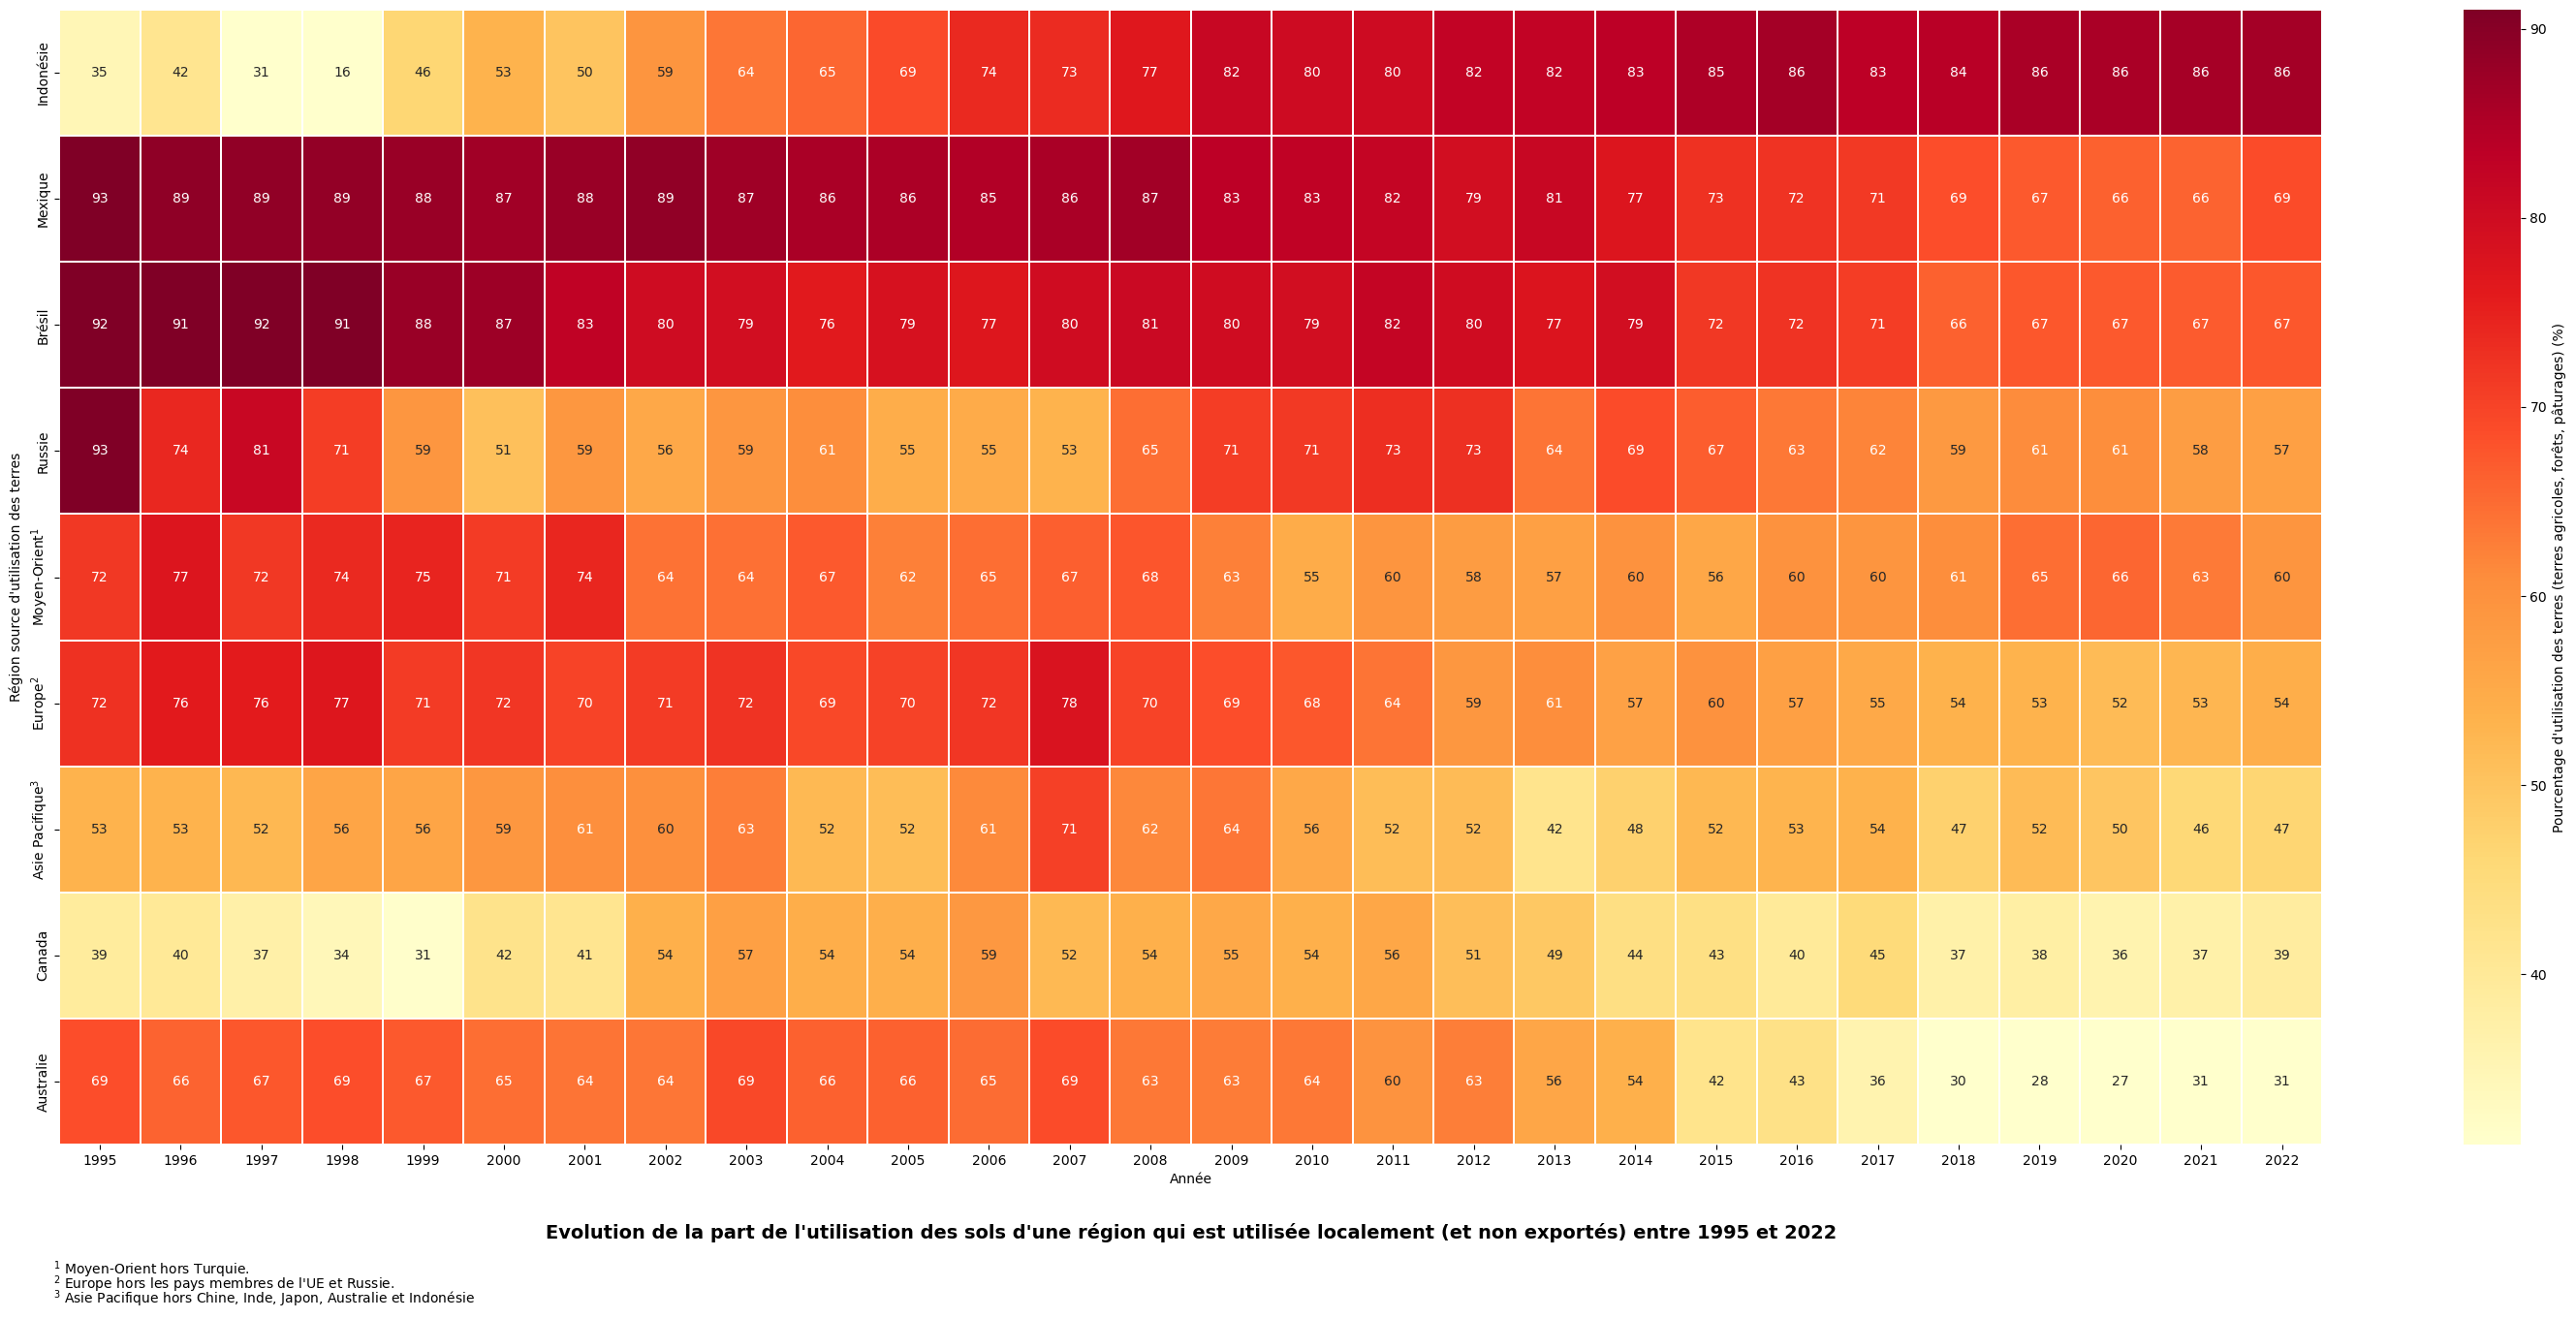

In [41]:
regions_ast = ["Indonésie", "Mexique", "Brésil", "Russie", "Moyen-Orient$^{1}$", "Europe$^{2}$", "Asie Pacifique$^{3}$", "Canada", "Australie"]

# Renommer les colonnes et les index avec les noms des régions

df1.index = regions_ast
df1.columns.name = "Année"
df1.index.name = "Région source d'utilisation des terres"
    
    
# Créer une nouvelle figure pour chaque heatmap
plt.figure(figsize=(30, 15))
    
# Créer la heatmap avec seaborn
sns.heatmap(df1, vmin=31, vmax=91,
            annot=True, cmap='YlOrRd', linewidths=0.1,
            cbar_kws={"label": "Pourcentage d'utilisation des terres (terres agricoles, forêts, pâturages) (%)",
                       "format": FuncFormatter(lambda x, _: f'{x:.0f}'), "ticks": range(10, 100, 10)})

    
# Ajouter un titre et ajuster la disposition
plt.title(f"Evolution de la part de l'utilisation des sols d'une région qui est utilisée localement (et non exportés) entre 1995 et 2022", fontsize=14, fontweight='bold', y=-0.09)
plt.subplots_adjust(bottom=0.3)
    
# Ajouter des notes de bas de page
plt.subplots_adjust(bottom=0.3)
plt.figtext(0.02, 0.07, '$^{1}$ Moyen-Orient hors Turquie.', fontsize=10)
plt.figtext(0.02, 0.06, "$^{2}$ Europe hors les pays membres de l'UE et Russie.", fontsize=10)
plt.figtext(0.02, 0.05, "$^{3}$ Asie Pacifique hors Chine, Inde, Japon, Australie et Indonésie", fontsize=10)    

# Ajuster la disposition pour s'assurer que tout est inclus dans l'image
plt.tight_layout(rect=[0, 0.1, 1, 0.95])
    
# Sauvegarder la heatmap dans un fichier PNG
frame_filename = f'C:\Master 1\Stage\Exio3\IOT_2011_ixi\LandUse_Imp_Diag\LandUse_Exp.png'
plt.savefig(frame_filename, bbox_inches='tight')

plt.show()